<a href="https://colab.research.google.com/github/Akash-Rayhan/LinearRegressionfromScratch/blob/main/MultivariateLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import files
uploaded = files.upload() #upload file

Saving ex1data2.txt to ex1data2.txt


In [ ]:
import pandas as pd
dataFrame = pd.read_csv(io.BytesIO(uploaded['ex1data2.txt'])); #read comma separated value
dataFrame.head(5)

,size of the house,number of bedrooms,price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


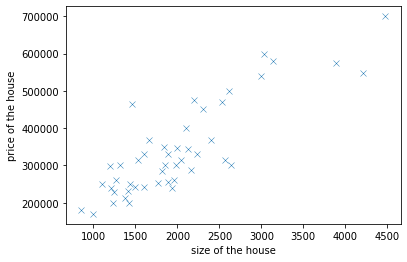

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.scatterplot(x= dataFrame['size of the house'], y=dataFrame['price of the house'], marker="x")

In [ ]:
import numpy as np
dataFrame.columns = ["size of the house","number of bedrooms","price of the house"]
data = np.array(dataFrame)
x = data[:,0:2]
y = data[:,2]
m = len(x)
y = np.reshape(y,(m,1))



Normalization of Features

In [ ]:
#feature_norms = np.linalg.norm(x, axis = 0)
x_mean = np.mean(x,axis=0) # axis=0 means spit out column-wise mean
x_std = np.std(x,axis=0)
x_norm = (x - x_mean)/x_std

x_norm = np.column_stack([np.ones(m), x_norm])#add ones column to the left of feature shape(mx3)


In [ ]:
def predictions(X,Theta):
  return np.matmul(X,Theta)

In [ ]:
def costFunction(X,Y,Theta):
  #return (np.matmul((predictions(X,Theta)-Y).T , (predictions(X,Theta)-Y))) / (2*Y.shape[0])
  return ((predictions(X,Theta)-Y).T @ (predictions(X,Theta)-Y))/(2*Y.shape[0]) # "@" symbol means matrix multiplication

In [ ]:
theta = np.zeros((x_norm.shape[1],1))#inital theta shape(2x1)
J = costFunction(x_norm,y,theta)
print(J)

[[6.55915481e+10]]


In [ ]:
def gradientDescent(X,Y,Theta,alpha,iterations):
  m = X.shape[0]
  J_hist = []
  count = 0
  iter_array = []
  for _ in range(iterations):
    predictions_ = predictions(X,Theta)
    costFunction_ = (X.T @ (predictions_ - Y)) / m
    Theta = Theta - (alpha*costFunction_)
    J_hist.append(costFunction(X,Y,Theta))
    count += 1
    iter_array.append(count)
  return Theta,J_hist,iter_array

In [ ]:
theta = np.zeros((x_norm.shape[1],1))#inital theta shape(3x1)
theta, J_hist,iter_array = gradientDescent(x_norm,y,theta,0.3,50)
print(theta)

[[340412.65345227]
 [109398.90129361]
 [ -6529.45967813]]


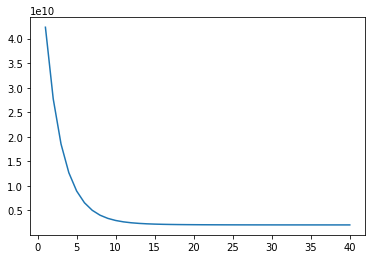

In [ ]:
J_hist = np.array(J_hist)
sns.lineplot(x=iter_array,y=J_hist.ravel()) 

In [ ]:
price = [1,-0.44127, -0.22368] @ theta # @ matrix multiplication
print(price)

[293598.70981924]
